# Figure 6

## Imports

In [1]:
import dolfin
import numpy
import scipy.optimize

from scipy.interpolate import interp1d

import dolfin_mech                    as dmech
import matplotlib.pyplot              as plt
import micro_poro_structure_generator as gen

## Importing experimental data

In [2]:
jorba_tensile_test = numpy.load('jorba_tensile_test.npy')
eps_jorba_tensile_test = jorba_tensile_test[:, 0]
sig_jorba_tensile_test = jorba_tensile_test[:, 1]

## Defining geometry

Info    : Recomputing incorrect OpenCASCADE wire in surface 6
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 40%] Meshing curve 3 (Line)
Info    : [ 60%] Meshing curve 4 (Line)
Info    : [ 80%] Meshing curve 5 (Ellipse)
Info    : Done meshing 1D (Wall 0.000775407s, CPU 0.000692s)
Info    : Meshing 2D...
Info    : Meshing surface 6 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0780138s, CPU 0.069121s)
Info    : 1891 nodes 3787 elements
Info    : Writing 'Fig6-mesh.msh'...
Info    : Done writing 'Fig6-mesh.msh'
Info    : Running '/Users/tayebi/miniconda3/envs/all/bin/gmsh -2 -o Fig6-mesh.msh -format msh22 Fig6-mesh.msh' [Gmsh 4.9.0, 1 node, max. 1 thread]
Info    : Started on Thu Mar  6 17:57:15 2025
Info    : Reading 'Fig6-mesh.msh'...
Info    : 11 entities
Info    : 1891 nodes
Info    : 3655 elements
Info    : Done reading 'Fig6-mesh.msh'
Info    : Meshing 1D...
Info    : Done meshing 1D (Wall 3.7362e-05

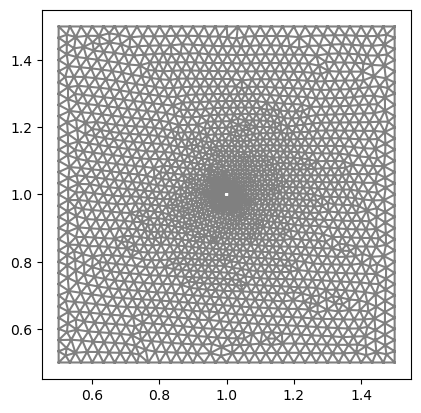

In [3]:
seeds_filename    = "Fig6.dat"
mesh_filebasename = "Fig6-mesh"
qois_filename     = "Fig6-qois.dat"
res_basename      = "Fig6"

gen.generate_mesh_2D_square_w_circular_inclusions(
    mesh_filename = mesh_filebasename,
    width = 1.,
    r = 1./100,
    lcar = 1./30,
    shift_x = 0.5,
    shift_y = 0.5)

mesh = dolfin.Mesh(mesh_filebasename+".xml")
dolfin.plot(mesh)

## Loading 

In [7]:
load_params = {}
load_params["pf"] = 0
load_params["sigma_bar_00"] = 3
load_params["sigma_bar_11"] = 0.0
load_params["sigma_bar_01"] = 0.0
load_params["sigma_bar_10"] = 0.0

## Identifier function

## Model response 

/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/ufl/exproperators.py:336: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


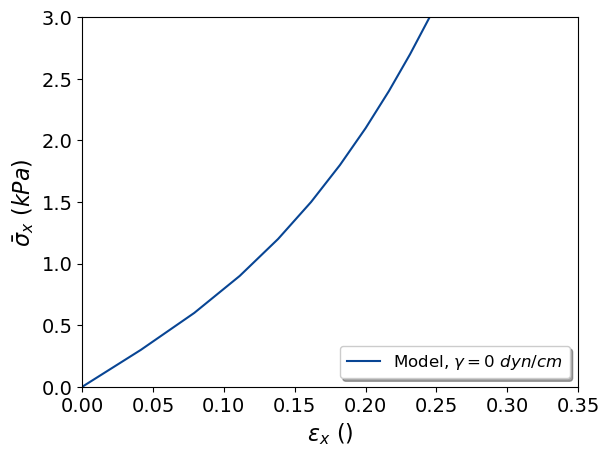

In [9]:
params = [8.382, 0.305, 0.903, 2.055]
mat_params = {"model":"exponentialneoHookean", "parameters":{"beta1":params[0], "beta2":params[1], "beta3":params[2], "beta4":100*params[0], "alpha":params[3]}}  
dmech.run_HollowBox_MicroPoroHyperelasticity(
    dim=2,
    mesh=mesh,
    mat_params=mat_params,
    load_params=load_params,
    step_params={"Deltat":1., "dt_ini":0.1, "dt_min":0.005, "dt_max":0.1},
    res_basename=res_basename,
    write_qois_limited_precision=False,
    verbose=1
)

qois_vals = numpy.loadtxt(qois_filename)
qois_name_list = open(qois_filename).readline().split()
sigma_lst = qois_vals[:, qois_name_list.index("sigma_bar_XX") - 1]
eps_lst = qois_vals[:, qois_name_list.index("U_bar_XX") - 1]

plt.plot()
plt.rc('xtick' , labelsize=14)
plt.rc('ytick' , labelsize=14)
plt.rc('legend', fontsize=12)
plt.xlabel(r'$\epsilon_x~()$', fontsize=16)
plt.ylabel(r'$\bar{\sigma}_x~(kPa)$', fontsize=16)


# plt.plot(eps_jorba_tensile_test, sig_jorba_tensile_test, '#D94801', label='[Jorba et al, 2019]')

plt.plot(eps_lst, sigma_lst, '#084594', label='Model, $\gamma = 0~dyn/cm$')

plt.xlim(0, 0.35)
plt.ylim(0, 3)
plt.legend(loc = 'lower right', fontsize=12, shadow=True)
plt.savefig('Jorba_iden.pdf',bbox_inches='tight')
plt.show()

In [10]:
# Calculate the slope near epsilon = 0
slope_near_0 = (sigma_lst[1] - sigma_lst[0]) / (eps_lst[1] - eps_lst[0])

# Find the index of the value in eps_lst that is closest to 0.2
index_near_0_2 = (numpy.abs(eps_lst - 0.2)).argmin()

# Calculate the slope near epsilon = 0.2
slope_near_0_2 = (sigma_lst[index_near_0_2 + 1] - sigma_lst[index_near_0_2]) / (eps_lst[index_near_0_2 + 1] - eps_lst[index_near_0_2])

print(f"Slope near epsilon = 0: {slope_near_0}")
print(f"Slope near epsilon = 0.2: {slope_near_0_2}")

Slope near epsilon = 0: 7.244452271840766
Slope near epsilon = 0.2: 18.30856918974038
